In [124]:
# Data handling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# ML model libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [125]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Laptop_Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [127]:
# Conversion from INR to USD
df['latest_price'] *= 0.013
df['old_price'] *= 0.013
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,324.87,426.270,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,254.67,277.225,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,259.87,363.870,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,279.37,363.870,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,324.87,435.370,25,3.7,1657,234


In [128]:
df['display_size'].value_counts()

Missing    332
15.6       218
16         135
14         131
13.3        40
17.3         9
14.96        7
14.1         6
13           4
15           3
14.2         3
16.2         3
12.2         2
14.9         1
16.1         1
13.4         1
Name: display_size, dtype: int64

In [129]:
# Change 'Missing' values to NaN
df = df.replace(to_replace="Missing", value=np.nan)
df['display_size'].value_counts()

15.6     218
16       135
14       131
13.3      40
17.3       9
14.96      7
14.1       6
13         4
15         3
14.2       3
16.2       3
12.2       2
14.9       1
16.1       1
13.4       1
Name: display_size, dtype: int64

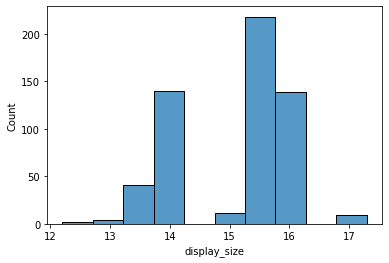

In [130]:
# Replace null values
df["model"] = df["model"].fillna(value=(df["model"].mode()[0]))
df["processor_gnrtn"] = df["processor_gnrtn"].fillna(value=(df["processor_gnrtn"].mode()[0]))

# Display size is also missing some values, let's see how evenly it's distributed
df["display_size"] = df["display_size"].astype(float).round(2)
sns.histplot(x=df["display_size"],bins=10)
# It looks like mean would be the best way to fill display size
df["display_size"] = df["display_size"].fillna(value=(df["display_size"].mean()))

In [131]:
# And now the null values are all gone
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    float64
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [132]:
# Change GB columns to discrete values
df['ssd'] = df['ssd'].replace(' GB', '', regex=True)
df['hdd'] = df['hdd'].replace(' GB', '', regex=True)
df['ram_gb'] = df['ram_gb'].replace(' GB GB', '', regex=True)

In [133]:
# Get dummies for categorical values
df = pd.get_dummies(df, columns = ['brand', 'processor_brand','ram_type','os','Touchscreen', 'msoffice','os_bit', 'weight', 'processor_gnrtn'])

In [134]:
# Create independent and dependednt variables
X = df.drop(columns = ['model', 'processor_name', 'latest_price', 'old_price', 'discount'])
y = df['latest_price']

In [135]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Linear Regression

In [136]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [137]:
lr_pred = lr.predict(X_test)

In [144]:
metrics.mean_squared_error(y_test, lr_pred)

111778.84604916742

In [138]:
metrics.r2_score(y_test, lr_pred)

0.6862766075574511

Text(0, 0.5, 'lr_pred')

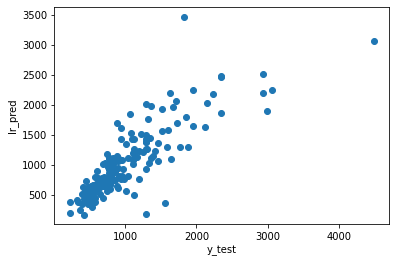

In [139]:
plt.scatter(y_test, lr_pred)
plt.xlabel('y_test')
plt.ylabel('lr_pred')

## Random Forest Regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [141]:
rfr_pred = regressor.predict(X_test)

In [145]:
metrics.mean_squared_error(y_test, rfr_pred)

70129.97459027219

In [142]:
metrics.r2_score(y_test, rfr_pred)

0.803170149648062

Text(0, 0.5, 'rfr_pred')

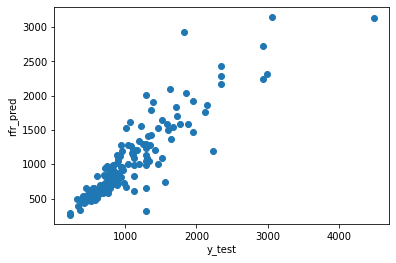

In [143]:
plt.scatter(y_test, rfr_pred)
plt.xlabel('y_test')
plt.ylabel('rfr_pred')